### 0. Loading the Data

Drawing Link :https://excalidraw.com/#json=FRVe2gj5pvD1IbjI_IZT8,2ENyvKRwftE-Moup3MyoCg

Github Repo Link : https://github.com/AshishJangra27/datasets/tree/main

LinkedIn : https://in.linkedin.com/in/ashish-jangra

In [ ]:
!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 328 (delta 19), reused 54 (delta 9), pack-reused 235 (from 1)
Receiving objects: 100% (328/328), 278.62 MiB | 15.71 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Updating files: 100% (225/225), done.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv('/content/datasets/Job Postings/jobs.csv.zip')

### 1. Data Exploration

#### 1.1) Checking Null Values

In [ ]:
df.isnull().sum()

,0
job_id,480
job_role,480
company,481
experience,1749
salary,480
location,1706
rating,36199
reviews,36199
resposibilities,500
posted_on,480


#### 1.2) Checking Duplicates

In [ ]:
df.duplicated(subset = 'job_id').sum()

np.int64(6137)

#### 1.3) Remove columns

In [ ]:
del df['posted_on']
del df['job_link']
del df['company_link']

### 2. Data Cleaning

#### 2.1) Dealing with Null Values

- Remove rows with null values except rating & reviews
- Deal with rating and reviews sepperately

In [ ]:
df.isnull().sum()

df = df.dropna(subset = ['job_id','resposibilities','company'])

df['experience'] = df['experience'].fillna('5-10 Yrs')
df['location'] = df['location'].fillna('Bangalore/Bengaluru')
df['rating'] = df['rating'].fillna(0.0)
df['reviews'] = df['reviews'].fillna('0 Reviews')

#### 2.2) Dealing with Duplicates

In [ ]:
df = df.drop_duplicates(subset = 'job_id')

#### 2.3) Change the datatype of job_id

In [ ]:
df['job_id'] = df['job_id'].astype('int').astype(str)

#### 2.4) Clean Experience Column

In [ ]:
df['min_experience'] = df['experience'].str.replace('Yrs','').str.split('-').str[0].str.strip().astype('int')
df['max_experience'] = df['experience'].str.replace('Yrs','').str.split('-').str[1].str.strip().astype('int')

#### 2.5) Clean Salary Column

In [ ]:
df['clean_salary'] = df['salary'].str.replace(' PA.','').str.replace(',','').str.split('-').str[0].str.strip()

df = df[(df['clean_salary'] != '9.5 Cr and above') & (df['clean_salary'] != 'Less than 5000') &  (df['clean_salary'] != 'Less than 50000')]
df['min_salary'] = df['clean_salary'].str.split('(').str[0].str.strip()
del df['clean_salary']


df['clean_salary'] = df['salary'].str.replace(' PA.','').str.replace(',','').str.split('-').str[1].str.split('(').str[0].str.strip()
df = df[df['clean_salary'] != '9.5 Cr and above']
df['max_salary'] = df['clean_salary'].fillna('Not disclosed')
del df['clean_salary']

del df['salary']
del df['experience']

#### 2.7) Clean review columns

In [ ]:
df['reviews'] = df['reviews'].str.split(' ').str[0].astype('int')

### 3. Data Analysis

#### 3.1) Overall Analysis

In [ ]:
print('-'*30)
print('Total Jobs         : ', len(df))
print('Total Companies    : ', df['company'].nunique())
print('-'*30)

------------------------------
Total Jobs         :  72967
Total Companies    :  15310
------------------------------


#### 3.2) Top 5 companies (Reviews)

<Axes: ylabel='reviews'>

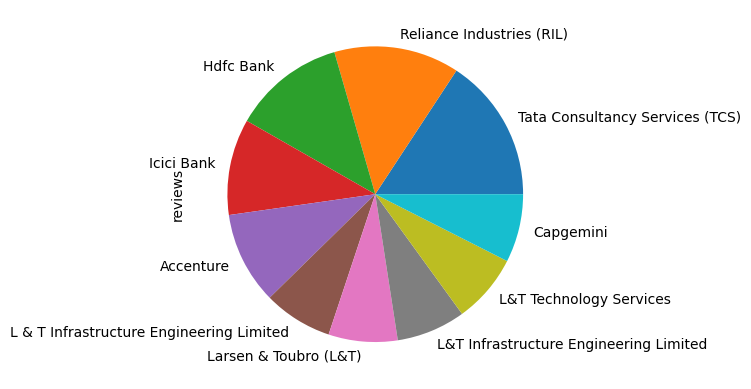

In [ ]:
df.groupby('company')['reviews'].min().sort_values(ascending = False).head(10).plot(kind = 'pie')

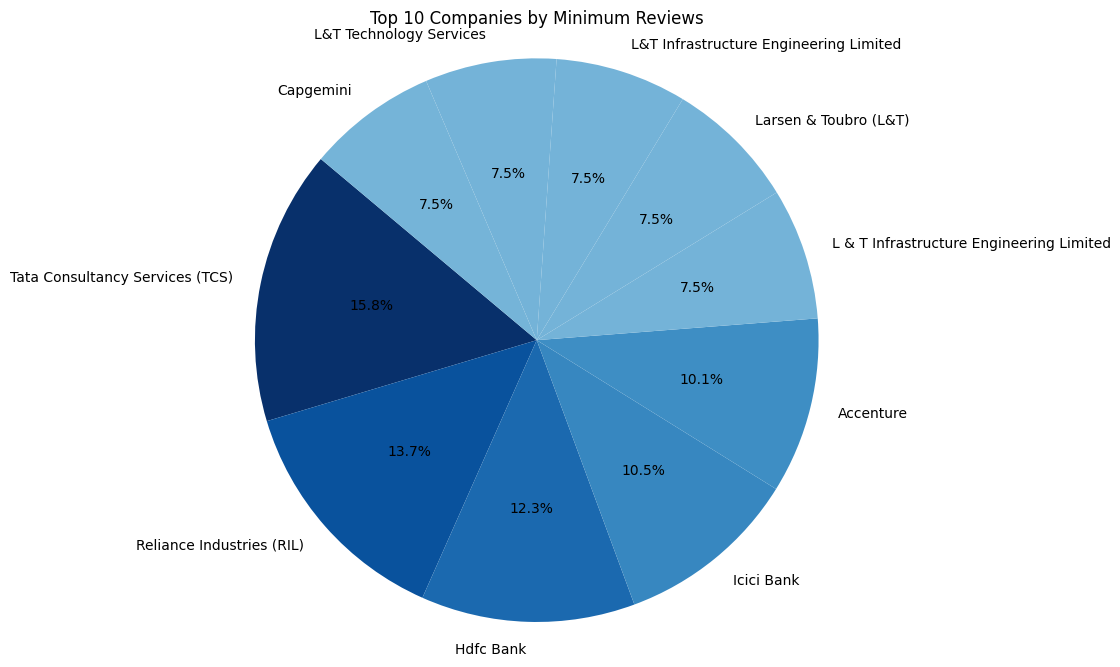

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Import the colormap module

company_reviews = df.groupby('company')['reviews'].min().sort_values(ascending=False).head(10)

colors = cm.Blues(company_reviews / float(max(company_reviews)))


plt.figure(figsize=(8, 8)) # Optional: Adjust figure size
plt.pie(company_reviews, labels=company_reviews.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 10 Companies by Minimum Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

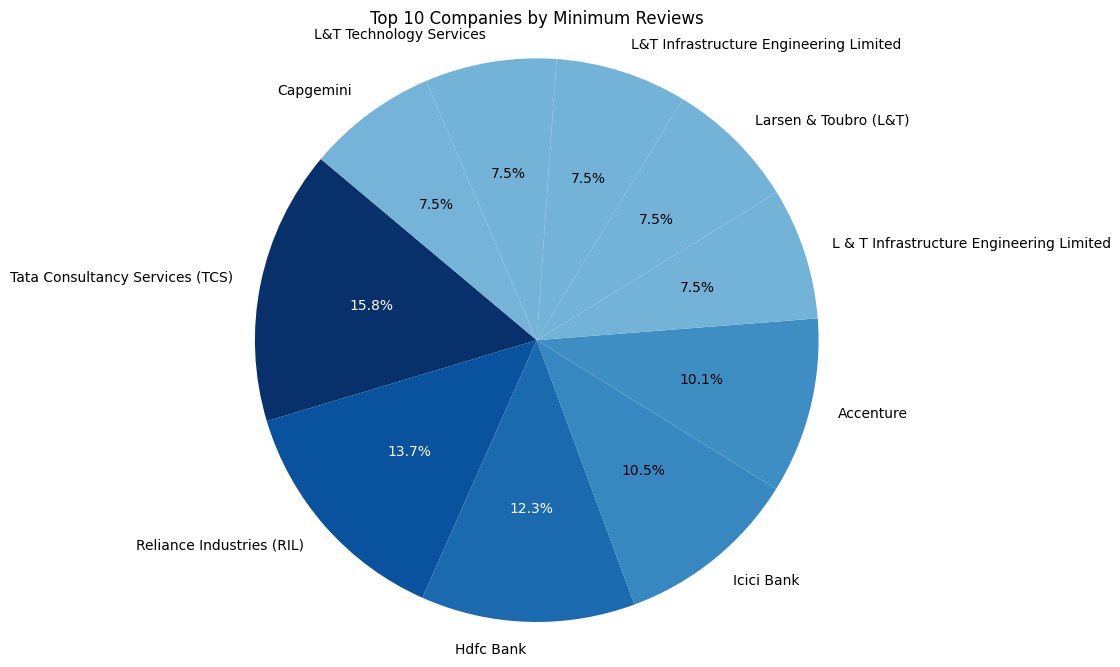

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming you want to plot the same data
company_reviews = df.groupby('company')['reviews'].min().sort_values(ascending=False).head(10)

# Define a colormap (e.g., Blues)
colors = cm.Blues(company_reviews / float(max(company_reviews)))

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(company_reviews, labels=company_reviews.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops=dict(color="black"))

# Identify the indices of the top 3 values
top3_indices = company_reviews.nlargest(3).index

# Set the color of the autotexts (percentage annotations) for the top 3 slices to white
for i, review_count in enumerate(company_reviews):
    if company_reviews.index[i] in top3_indices:
        autotexts[i].set_color('white')

plt.title('Top 10 Companies by Minimum Reviews')
plt.axis('equal')
plt.show()

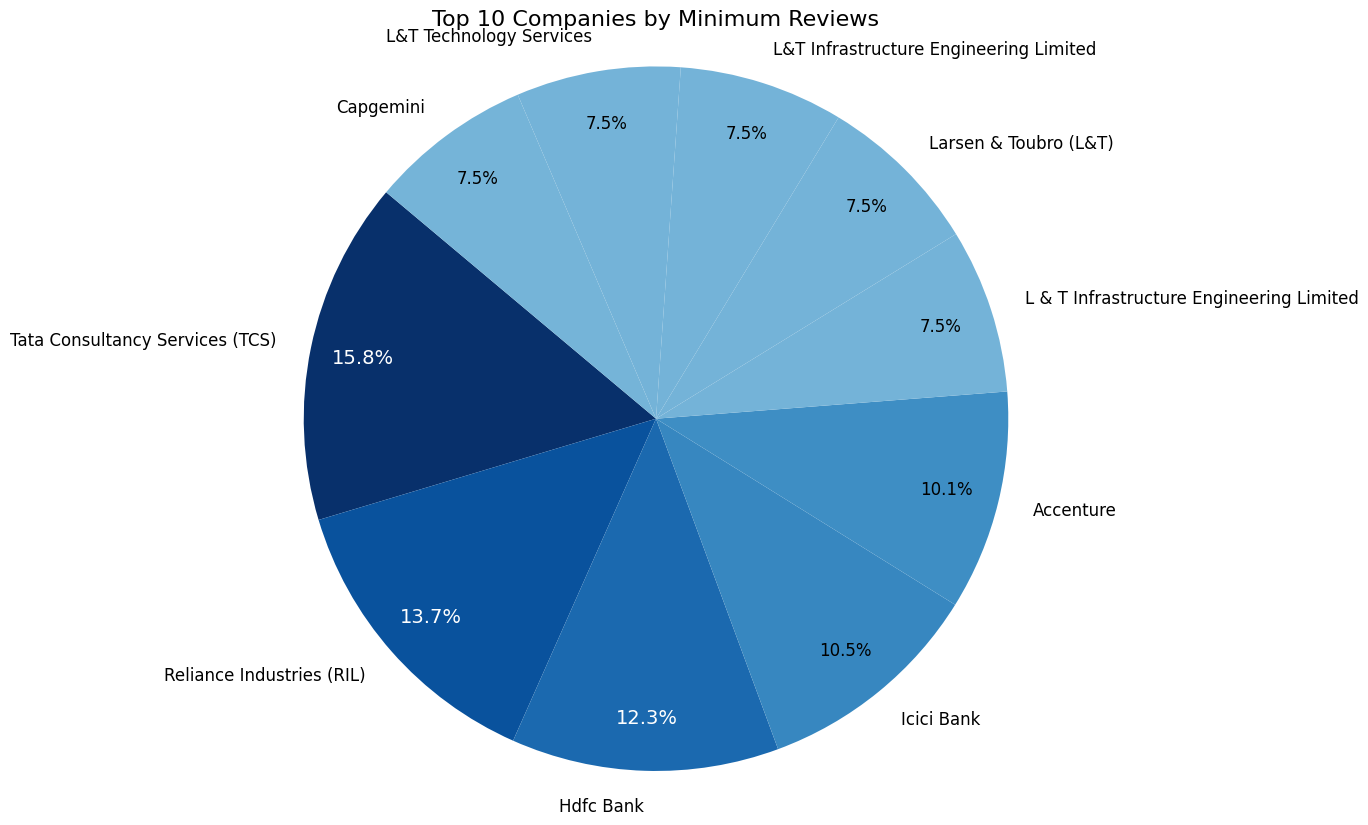

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming you want to plot the same data
company_reviews = df.groupby('company')['reviews'].min().sort_values(ascending=False).head(10)

# Define a colormap (e.g., Blues)
colors = cm.Blues(company_reviews / float(max(company_reviews)))

plt.figure(figsize=(10, 10)) # Increase figure size for better readability
wedges, texts, autotexts = plt.pie(
    company_reviews,
    labels=company_reviews.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="black", fontsize=12),  # Set font for labels
    pctdistance=0.85 # Adjust distance of annotations from the center
)

# Identify the indices of the top 3 values
top3_indices = company_reviews.nlargest(3).index

# Set the color and font for the autotexts (percentage annotations) for the top 3 slices to white and larger font size
for i, review_count in enumerate(company_reviews):
    if company_reviews.index[i] in top3_indices:
        autotexts[i].set_color('white')
        autotexts[i].set_fontsize(14) # Increase font size for top 3 annotations

# Set font size for all other annotations
for i, review_count in enumerate(company_reviews):
    if company_reviews.index[i] not in top3_indices:
        autotexts[i].set_fontsize(12) # Set font size for other annotations


plt.title('Top 10 Companies by Minimum Reviews', fontsize=16) # Set font for title
plt.axis('equal')
plt.show()

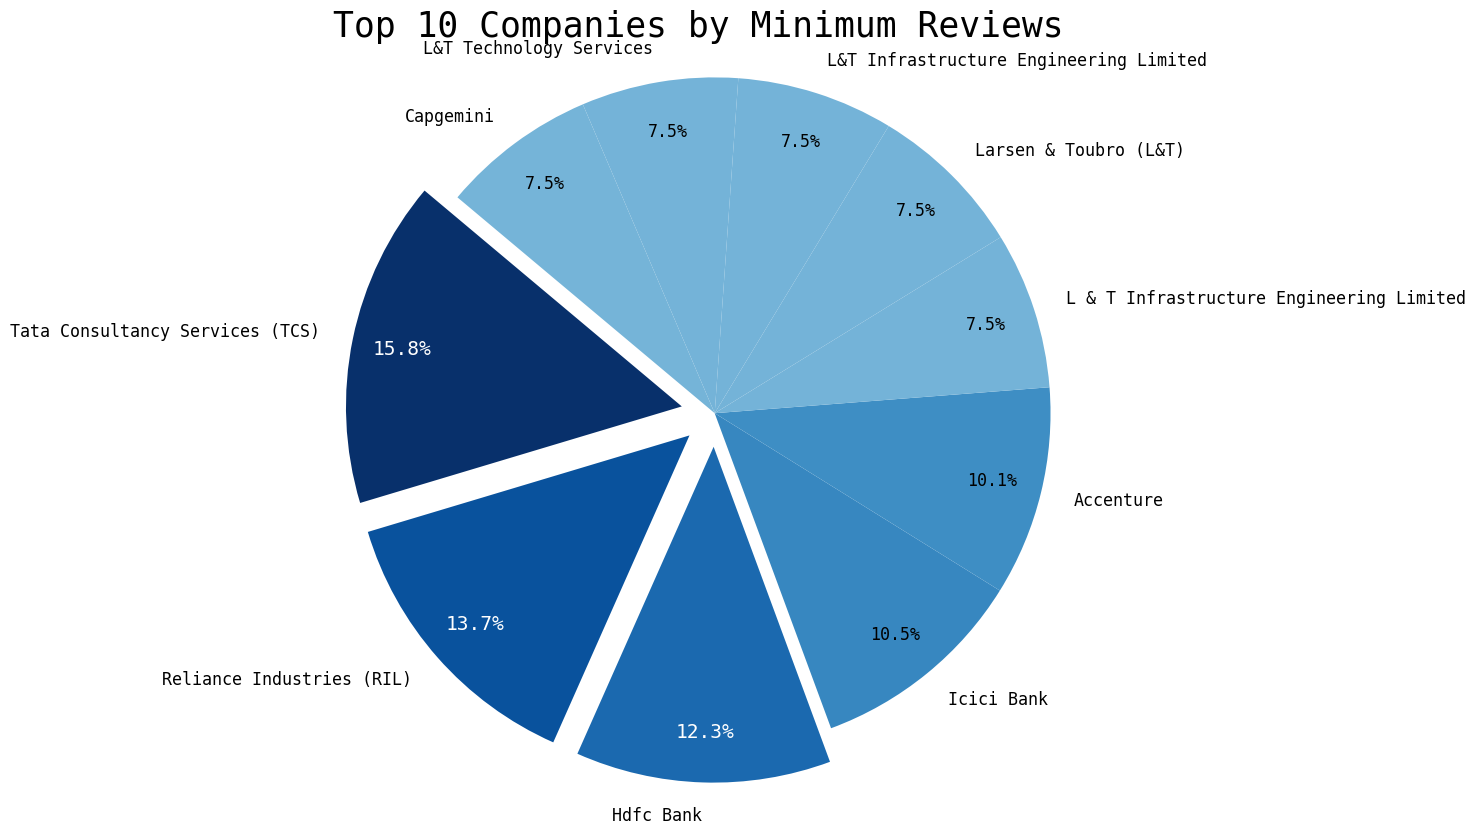

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming you want to plot the same data
company_reviews = df.groupby('company')['reviews'].min().sort_values(ascending=False).head(10)

# Define a colormap (e.g., Blues)
colors = cm.Blues(company_reviews / float(max(company_reviews)))

# Create an explode list: Explode the first 3, rest are 0
explode = [0.1 if i < 3 else 0 for i in range(len(company_reviews))]


plt.figure(figsize=(10, 10)) # Increase figure size for better readability
wedges, texts, autotexts = plt.pie(
    company_reviews,
    labels=company_reviews.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="black", fontsize=12, fontname='monospace'),  # Set font for labels
    pctdistance=0.85, # Adjust distance of annotations from the center
    explode=explode # Add the explode argument
)

# Identify the indices of the top 3 values (this part remains for annotation color/size)
top3_indices = company_reviews.nlargest(3).index

# Set the color and font for the autotexts (percentage annotations) for the top 3 slices to white and larger font size
for i, review_count in enumerate(company_reviews):
    if company_reviews.index[i] in top3_indices:
        autotexts[i].set_color('white')
        autotexts[i].set_fontsize(14) # Increase font size for top 3 annotations

# Set font size for all other annotations
for i, review_count in enumerate(company_reviews):
    if company_reviews.index[i] not in top3_indices:
        autotexts[i].set_fontsize(12) # Set font size for other annotations


plt.title('Top 10 Companies by Minimum Reviews', fontsize=25, fontname='monospace') # Set font for title
plt.axis('equal')
plt.show()

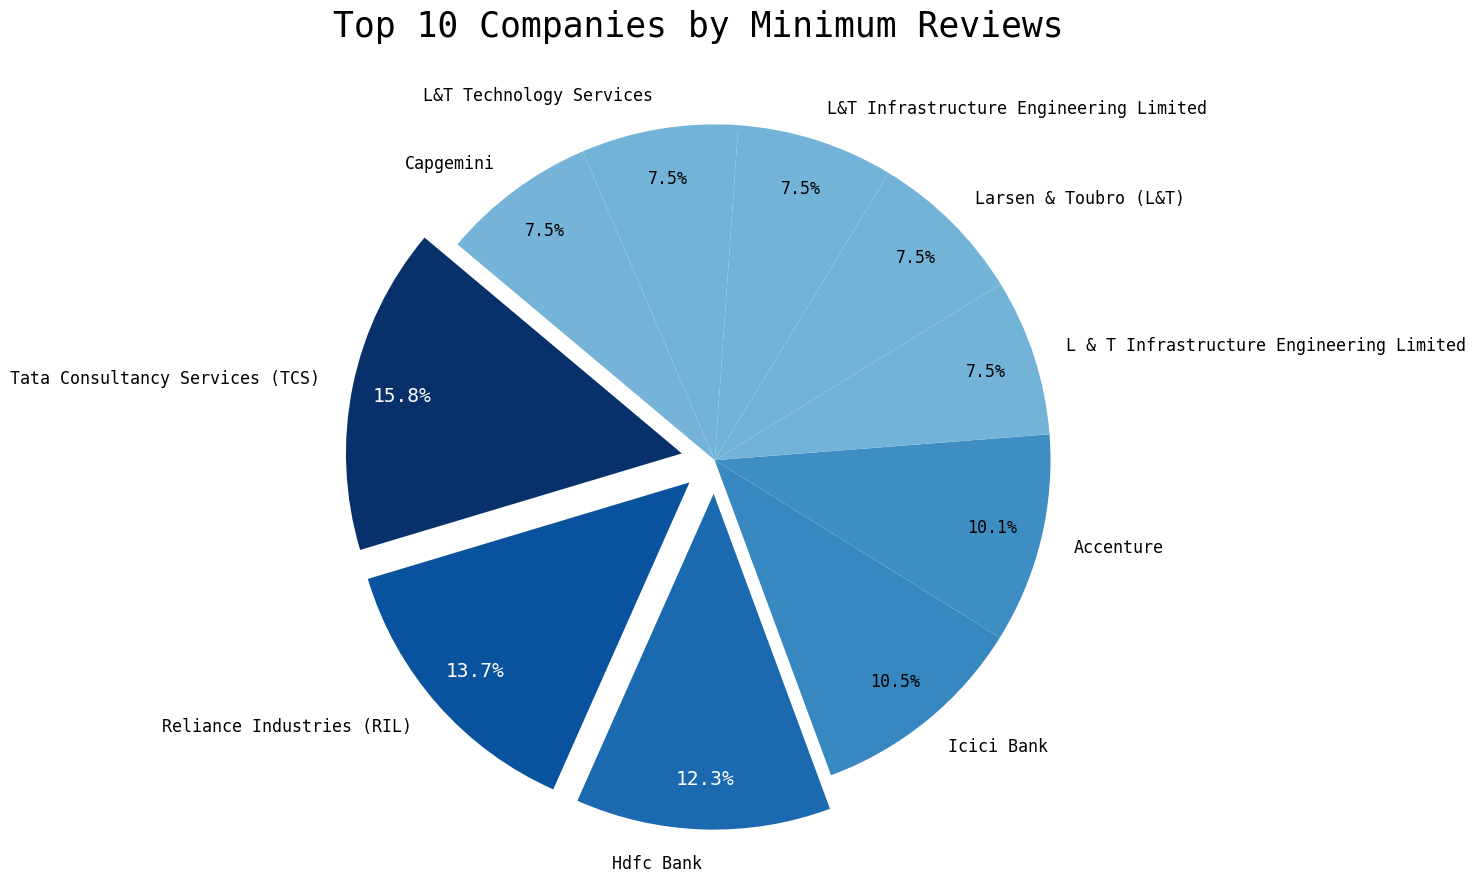

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming you want to plot the same data
company_reviews = df.groupby('company')['reviews'].min().sort_values(ascending=False).head(10)

# Define a colormap (e.g., Blues)
colors = cm.Blues(company_reviews / float(max(company_reviews)))

# Create an explode list: Explode the first 3, rest are 0
explode = [0.1 if i < 3 else 0 for i in range(len(company_reviews))]


plt.figure(figsize=(10, 10)) # Increase figure size for better readability
wedges, texts, autotexts = plt.pie(
    company_reviews,
    labels=company_reviews.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="black", fontsize=12, fontname='monospace'),  # Set font for labels
    pctdistance=0.85, # Adjust distance of annotations from the center
    explode=explode # Add the explode argument
)

# Identify the indices of the top 3 values (this part remains for annotation color/size)
top3_indices = company_reviews.nlargest(3).index

# Set the color and font for the autotexts (percentage annotations) for the top 3 slices to white and larger font size
for i, review_count in enumerate(company_reviews):
    if company_reviews.index[i] in top3_indices:
        autotexts[i].set_color('white')
        autotexts[i].set_fontsize(14) # Increase font size for top 3 annotations

# Set font size for all other annotations
for i, review_count in enumerate(company_reviews):
    if company_reviews.index[i] not in top3_indices:
        autotexts[i].set_fontsize(12) # Set font size for other annotations


plt.title('Top 10 Companies by Minimum Reviews', fontsize=25, fontname='monospace', pad=40) # Added pad argument
plt.axis('equal')
plt.show()

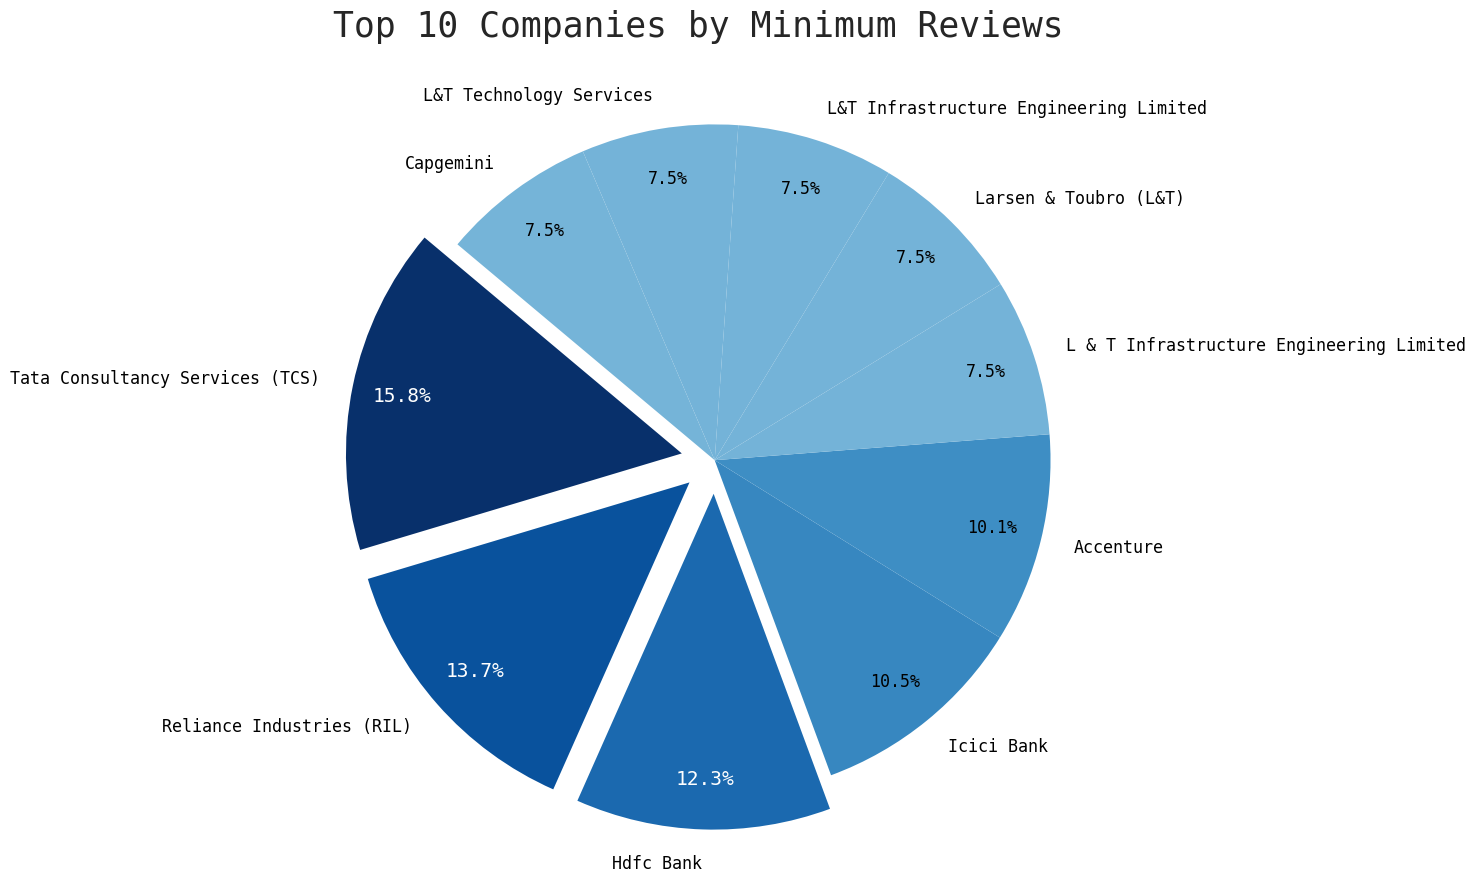

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming you want to plot the same data
company_reviews = df.groupby('company')['reviews'].min().sort_values(ascending=False).head(10)

# Seaborn typically works well with dataframes, so let's create one from the series
company_reviews_df = company_reviews.reset_index()
company_reviews_df.columns = ['company', 'reviews']

# Define a colormap (e.g., Blues)
colors = cm.Blues(company_reviews_df['reviews'] / float(max(company_reviews_df['reviews'])))

plt.figure(figsize=(10, 10))

# Seaborn doesn't have a direct pie chart function like matplotlib.
# We will use matplotlib's pie function but incorporate seaborn styling.
plt.style.use('seaborn-v0_8-darkgrid') # Apply a seaborn style

# Create an explode list: Explode the first 3, rest are 0
explode = [0.1 if i < 3 else 0 for i in range(len(company_reviews_df))]

wedges, texts, autotexts = plt.pie(
    company_reviews_df['reviews'],
    labels=company_reviews_df['company'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="black", fontsize=12, fontname='monospace'),
    pctdistance=0.85,
    explode=explode
)

# Identify the indices of the top 3 values
top3_indices = company_reviews_df['reviews'].nlargest(3).index

# Set the color and font for the autotexts (percentage annotations) for the top 3 slices to white and larger font size
for i, review_count in enumerate(company_reviews_df['reviews']):
    if i in top3_indices:
        autotexts[i].set_color('white')
        autotexts[i].set_fontsize(14)

# Set font size for all other annotations
for i, review_count in enumerate(company_reviews_df['reviews']):
    if i not in top3_indices:
        autotexts[i].set_fontsize(12)


plt.title('Top 10 Companies by Minimum Reviews', fontsize=25, fontname='monospace', pad=40)
plt.axis('equal')
plt.show()

#### 3.3) Companies Hiring for Data Analyst

In [ ]:
len(df[df['job_role'] == 'Data Analyst'])

59

#### 3.4) Skills needed for almost all the jobs

<Axes: xlabel='resposibilities'>

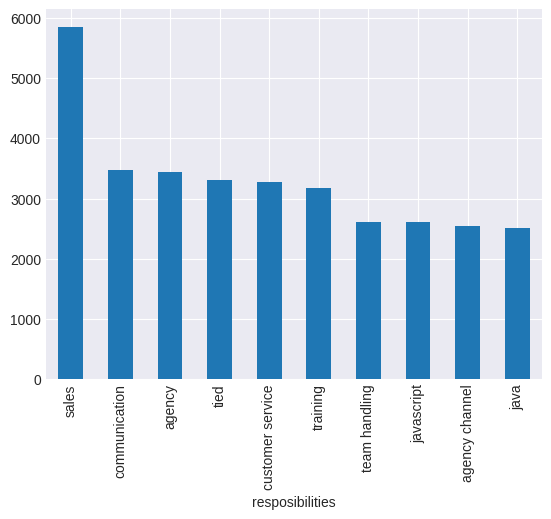

In [ ]:
df['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10).plot(kind = 'bar')

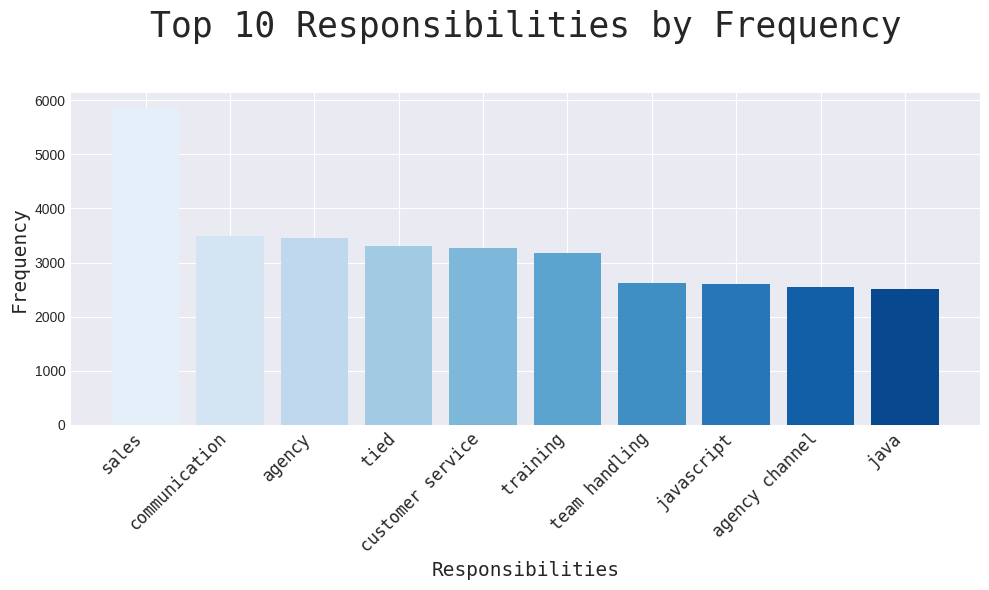

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
responsibility_counts = df['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10)

# Set Seaborn style
plt.style.use('seaborn-v0_8-darkgrid')

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(responsibility_counts.index, responsibility_counts.values, color=sns.color_palette("Blues", len(responsibility_counts)))

# Add title and labels
plt.title('Top 10 Responsibilities by Frequency', fontsize=25, fontname='monospace', pad=40)
plt.xlabel('Responsibilities', fontsize=14, fontname='monospace')
plt.ylabel('Frequency', fontsize=14, fontname='monospace')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, fontname='monospace')

# Display the plot
plt.tight_layout()
plt.show()


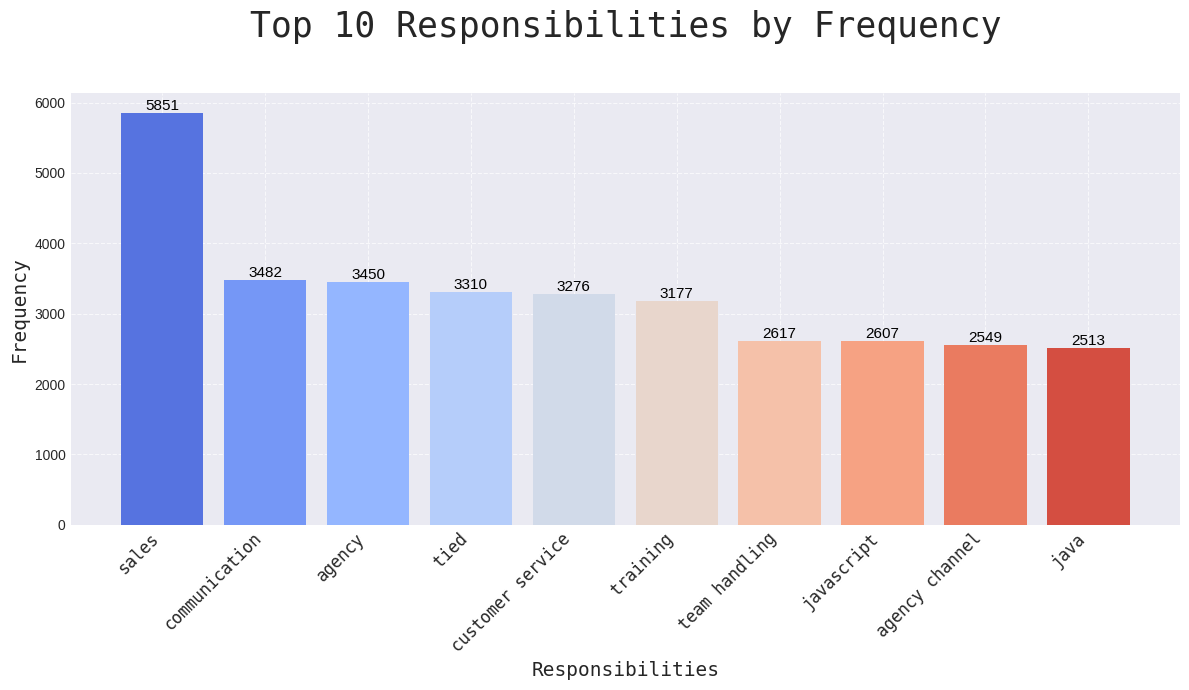

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
responsibility_counts = df['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10)

# Set Seaborn style
plt.style.use('seaborn-v0_8-darkgrid')

# Create the bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(responsibility_counts.index, responsibility_counts.values,
               color=sns.color_palette("coolwarm", len(responsibility_counts)))

# Add title and labels
plt.title('Top 10 Responsibilities by Frequency', fontsize=25, fontname='monospace', pad=40)
plt.xlabel('Responsibilities', fontsize=14, fontname='monospace')
plt.ylabel('Frequency', fontsize=14, fontname='monospace')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, fontname='monospace')

# Annotate each bar with its value
for bar, value in zip(bars, responsibility_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value}',
             ha='center', va='bottom', fontsize=11, color='black')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

#### 3.5)  Skills to get hired in HDFC Bank

<Axes: xlabel='resposibilities'>

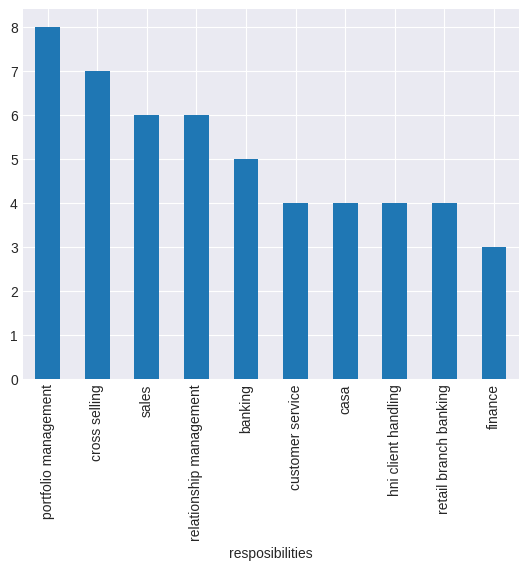

In [ ]:
df[df['company'] == 'Hdfc Bank']['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10).plot(kind = 'bar')

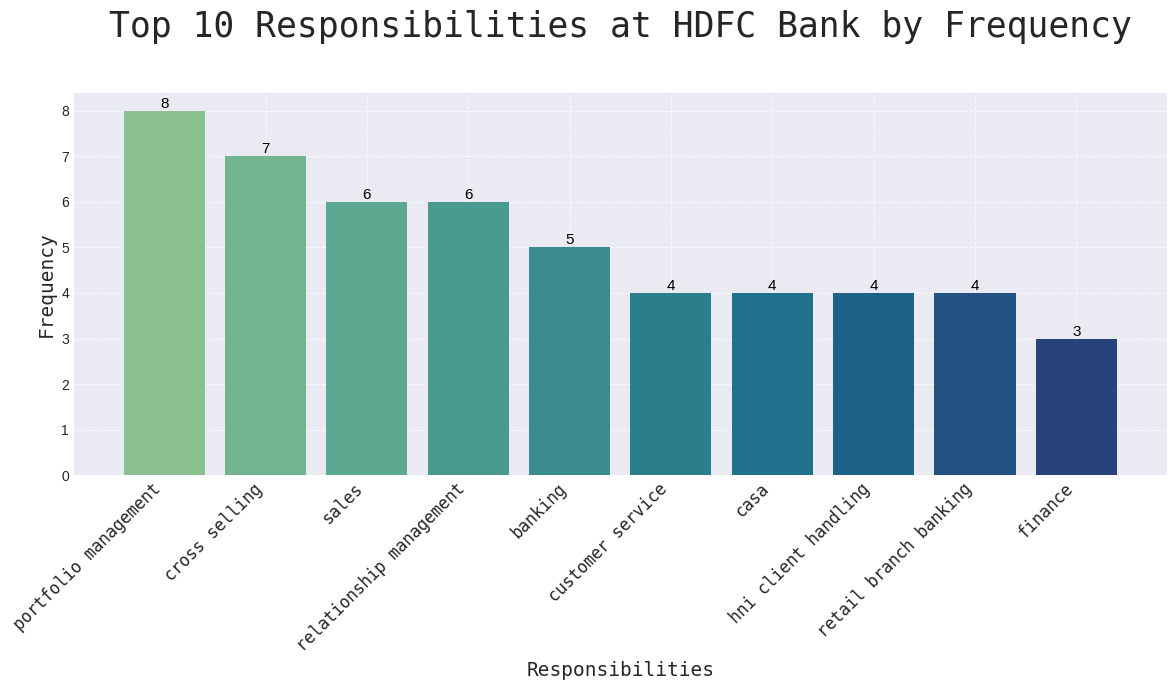

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for HDFC Bank and get top 10 responsibilities
hdfc_responsibilities = (
    df[df['company'] == 'Hdfc Bank']['resposibilities']
    .str.lower()
    .str.split(',')
    .explode()
    .value_counts()
    .head(10)
)

# Set Seaborn style
plt.style.use('seaborn-v0_8-darkgrid')

# Create the bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(hdfc_responsibilities.index, hdfc_responsibilities.values,
               color=sns.color_palette("crest", len(hdfc_responsibilities)))

# Add title and labels
plt.title('Top 10 Responsibilities at HDFC Bank by Frequency', fontsize=25, fontname='monospace', pad=40)
plt.xlabel('Responsibilities', fontsize=14, fontname='monospace')
plt.ylabel('Frequency', fontsize=14, fontname='monospace')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, fontname='monospace')

# Annotate each bar with its value
for bar, value in zip(bars, hdfc_responsibilities.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value}',
             ha='center', va='bottom', fontsize=11, color='black')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


#### 3.6) Skills Needed to become a Data Analyst

<Axes: xlabel='resposibilities'>

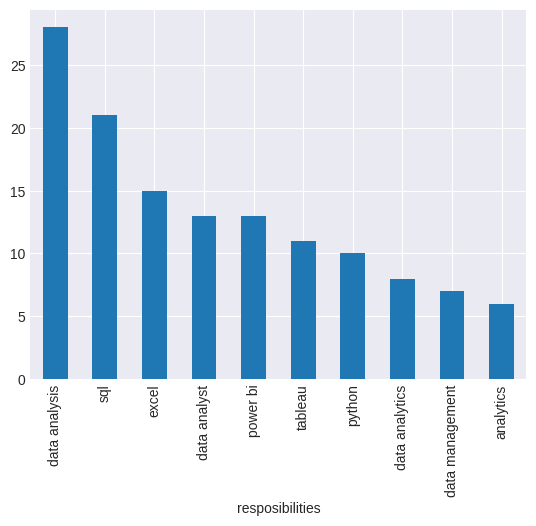

In [ ]:
df[df['job_role'] == 'Data Analyst']['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10).plot(kind = 'bar')